In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

Files already downloaded and verified
Files already downloaded and verified


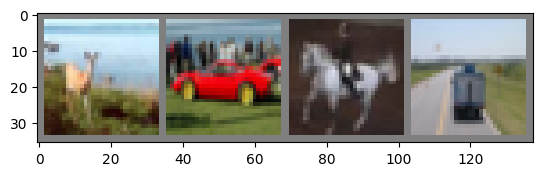

deer  car   horse truck


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


Training with learning rate = 10


Python(21247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[1,  2000] mini-batch loss: nan
[1,  4000] mini-batch loss: nan
[1,  6000] mini-batch loss: nan
[1,  8000] mini-batch loss: nan
[1, 10000] mini-batch loss: nan
[1, 12000] mini-batch loss: nan


Python(21282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[2,  2000] mini-batch loss: nan
[2,  4000] mini-batch loss: nan
[2,  6000] mini-batch loss: nan
[2,  8000] mini-batch loss: nan
[2, 10000] mini-batch loss: nan
[2, 12000] mini-batch loss: nan


Python(21360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[3,  2000] mini-batch loss: nan
[3,  4000] mini-batch loss: nan
[3,  6000] mini-batch loss: nan
[3,  8000] mini-batch loss: nan
[3, 10000] mini-batch loss: nan
[3, 12000] mini-batch loss: nan


Python(21462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[4,  2000] mini-batch loss: nan
[4,  4000] mini-batch loss: nan
[4,  6000] mini-batch loss: nan
[4,  8000] mini-batch loss: nan
[4, 10000] mini-batch loss: nan
[4, 12000] mini-batch loss: nan


Python(21527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[5,  2000] mini-batch loss: nan
[5,  4000] mini-batch loss: nan
[5,  6000] mini-batch loss: nan
[5,  8000] mini-batch loss: nan
[5, 10000] mini-batch loss: nan
[5, 12000] mini-batch loss: nan


Python(21705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[6,  2000] mini-batch loss: nan
[6,  4000] mini-batch loss: nan
[6,  6000] mini-batch loss: nan
[6,  8000] mini-batch loss: nan
[6, 10000] mini-batch loss: nan
[6, 12000] mini-batch loss: nan


Python(21780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21804) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[7,  2000] mini-batch loss: nan
[7,  4000] mini-batch loss: nan
[7,  6000] mini-batch loss: nan
[7,  8000] mini-batch loss: nan
[7, 10000] mini-batch loss: nan
[7, 12000] mini-batch loss: nan


Python(22040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[8,  2000] mini-batch loss: nan
[8,  4000] mini-batch loss: nan
[8,  6000] mini-batch loss: nan
[8,  8000] mini-batch loss: nan
[8, 10000] mini-batch loss: nan
[8, 12000] mini-batch loss: nan


Python(22165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[9,  2000] mini-batch loss: nan
[9,  4000] mini-batch loss: nan
[9,  6000] mini-batch loss: nan
[9,  8000] mini-batch loss: nan
[9, 10000] mini-batch loss: nan
[9, 12000] mini-batch loss: nan


Python(22201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[10,  2000] mini-batch loss: nan
[10,  4000] mini-batch loss: nan
[10,  6000] mini-batch loss: nan
[10,  8000] mini-batch loss: nan
[10, 10000] mini-batch loss: nan
[10, 12000] mini-batch loss: nan


Python(22343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[11,  2000] mini-batch loss: nan
[11,  4000] mini-batch loss: nan
[11,  6000] mini-batch loss: nan
[11,  8000] mini-batch loss: nan
[11, 10000] mini-batch loss: nan
[11, 12000] mini-batch loss: nan


Python(22422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[12,  2000] mini-batch loss: nan
[12,  4000] mini-batch loss: nan
[12,  6000] mini-batch loss: nan
[12,  8000] mini-batch loss: nan
[12, 10000] mini-batch loss: nan
[12, 12000] mini-batch loss: nan


Python(22475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[13,  2000] mini-batch loss: nan
[13,  4000] mini-batch loss: nan
[13,  6000] mini-batch loss: nan
[13,  8000] mini-batch loss: nan
[13, 10000] mini-batch loss: nan
[13, 12000] mini-batch loss: nan


Python(22538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[14,  2000] mini-batch loss: nan
[14,  4000] mini-batch loss: nan
[14,  6000] mini-batch loss: nan
[14,  8000] mini-batch loss: nan
[14, 10000] mini-batch loss: nan
[14, 12000] mini-batch loss: nan


Python(22591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22640) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[15,  2000] mini-batch loss: nan
[15,  4000] mini-batch loss: nan
[15,  6000] mini-batch loss: nan
[15,  8000] mini-batch loss: nan
[15, 10000] mini-batch loss: nan
[15, 12000] mini-batch loss: nan


Python(22664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22674) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[16,  2000] mini-batch loss: nan
[16,  4000] mini-batch loss: nan
[16,  6000] mini-batch loss: nan
[16,  8000] mini-batch loss: nan
[16, 10000] mini-batch loss: nan
[16, 12000] mini-batch loss: nan


Python(22681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[17,  2000] mini-batch loss: nan
[17,  4000] mini-batch loss: nan
[17,  6000] mini-batch loss: nan
[17,  8000] mini-batch loss: nan
[17, 10000] mini-batch loss: nan
[17, 12000] mini-batch loss: nan


Python(22747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[18,  2000] mini-batch loss: nan
[18,  4000] mini-batch loss: nan
[18,  6000] mini-batch loss: nan
[18,  8000] mini-batch loss: nan
[18, 10000] mini-batch loss: nan
[18, 12000] mini-batch loss: nan


Python(22781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[19,  2000] mini-batch loss: nan
[19,  4000] mini-batch loss: nan
[19,  6000] mini-batch loss: nan
[19,  8000] mini-batch loss: nan
[19, 10000] mini-batch loss: nan
[19, 12000] mini-batch loss: nan


Python(22826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[20,  2000] mini-batch loss: nan
[20,  4000] mini-batch loss: nan
[20,  6000] mini-batch loss: nan
[20,  8000] mini-batch loss: nan
[20, 10000] mini-batch loss: nan
[20, 12000] mini-batch loss: nan


Python(22848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[21,  2000] mini-batch loss: nan
[21,  4000] mini-batch loss: nan
[21,  6000] mini-batch loss: nan
[21,  8000] mini-batch loss: nan
[21, 10000] mini-batch loss: nan
[21, 12000] mini-batch loss: nan


Python(22907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(22962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[22,  2000] mini-batch loss: nan
[22,  4000] mini-batch loss: nan
[22,  6000] mini-batch loss: nan
[22,  8000] mini-batch loss: nan
[22, 10000] mini-batch loss: nan
[22, 12000] mini-batch loss: nan


Python(22999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[23,  2000] mini-batch loss: nan
[23,  4000] mini-batch loss: nan
[23,  6000] mini-batch loss: nan
[23,  8000] mini-batch loss: nan
[23, 10000] mini-batch loss: nan
[23, 12000] mini-batch loss: nan


Python(23171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[24,  2000] mini-batch loss: nan
[24,  4000] mini-batch loss: nan
[24,  6000] mini-batch loss: nan
[24,  8000] mini-batch loss: nan
[24, 10000] mini-batch loss: nan
[24, 12000] mini-batch loss: nan


Python(23219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[25,  2000] mini-batch loss: nan
[25,  4000] mini-batch loss: nan
[25,  6000] mini-batch loss: nan
[25,  8000] mini-batch loss: nan
[25, 10000] mini-batch loss: nan
[25, 12000] mini-batch loss: nan


Python(23268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Finished training with learning rate 10
Final Test Accuracy: 10.00%
Saved model to ./cifar_netq6_lr10.pth


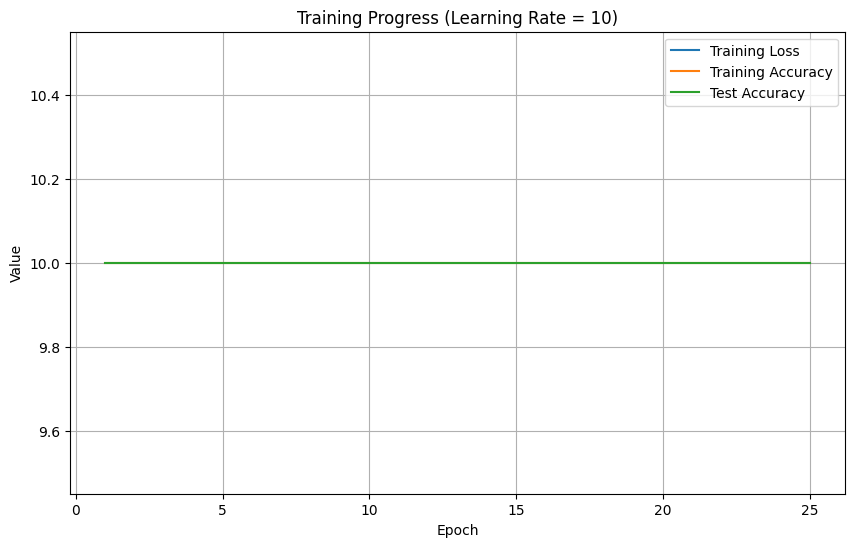


Training with learning rate = 0.1


Python(23327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[1,  2000] mini-batch loss: 2.367
[1,  4000] mini-batch loss: 2.363
[1,  6000] mini-batch loss: 2.361
[1,  8000] mini-batch loss: 2.360
[1, 10000] mini-batch loss: 2.356
[1, 12000] mini-batch loss: 2.361


Python(23355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[2,  2000] mini-batch loss: 2.360
[2,  4000] mini-batch loss: 2.358
[2,  6000] mini-batch loss: 2.361
[2,  8000] mini-batch loss: 2.362
[2, 10000] mini-batch loss: 2.362
[2, 12000] mini-batch loss: 2.359


Python(23416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[3,  2000] mini-batch loss: 2.356
[3,  4000] mini-batch loss: 2.358
[3,  6000] mini-batch loss: 2.359
[3,  8000] mini-batch loss: 2.357
[3, 10000] mini-batch loss: 2.361
[3, 12000] mini-batch loss: 2.362


Python(23476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[4,  2000] mini-batch loss: 2.362
[4,  4000] mini-batch loss: 2.367
[4,  6000] mini-batch loss: 2.362
[4,  8000] mini-batch loss: 2.358
[4, 10000] mini-batch loss: 2.362
[4, 12000] mini-batch loss: 2.361


Python(23533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[5,  2000] mini-batch loss: 2.359
[5,  4000] mini-batch loss: 2.358
[5,  6000] mini-batch loss: 2.360
[5,  8000] mini-batch loss: 2.357
[5, 10000] mini-batch loss: 2.354
[5, 12000] mini-batch loss: 2.358


Python(23574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23594) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23595) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[6,  2000] mini-batch loss: 2.361
[6,  4000] mini-batch loss: 2.364
[6,  6000] mini-batch loss: 2.361
[6,  8000] mini-batch loss: 2.360
[6, 10000] mini-batch loss: 2.359
[6, 12000] mini-batch loss: 2.359


Python(23608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[7,  2000] mini-batch loss: 2.363
[7,  4000] mini-batch loss: 2.356
[7,  6000] mini-batch loss: 2.358
[7,  8000] mini-batch loss: 2.357
[7, 10000] mini-batch loss: 2.355
[7, 12000] mini-batch loss: 2.361


Python(23643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[8,  2000] mini-batch loss: 2.362
[8,  4000] mini-batch loss: 2.359
[8,  6000] mini-batch loss: 2.358
[8,  8000] mini-batch loss: 2.363
[8, 10000] mini-batch loss: 2.363
[8, 12000] mini-batch loss: 2.361


Python(23708) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[9,  2000] mini-batch loss: 2.361
[9,  4000] mini-batch loss: 2.359
[9,  6000] mini-batch loss: 2.360
[9,  8000] mini-batch loss: 2.362
[9, 10000] mini-batch loss: 2.361
[9, 12000] mini-batch loss: 2.359


Python(23733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[10,  2000] mini-batch loss: 2.360
[10,  4000] mini-batch loss: 2.363
[10,  6000] mini-batch loss: 2.358
[10,  8000] mini-batch loss: 2.361
[10, 10000] mini-batch loss: 2.359
[10, 12000] mini-batch loss: 2.360


Python(23747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[11,  2000] mini-batch loss: 2.361
[11,  4000] mini-batch loss: 2.359
[11,  6000] mini-batch loss: 2.357
[11,  8000] mini-batch loss: 2.359
[11, 10000] mini-batch loss: 2.357
[11, 12000] mini-batch loss: 2.359


Python(23760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[12,  2000] mini-batch loss: 2.358
[12,  4000] mini-batch loss: 2.360
[12,  6000] mini-batch loss: 2.359
[12,  8000] mini-batch loss: 2.358
[12, 10000] mini-batch loss: 2.358
[12, 12000] mini-batch loss: 2.361


Python(23825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(23841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[13,  2000] mini-batch loss: 2.357


In [6]:
import torch.optim as optim
import matplotlib.pyplot as plt

learning_rates = [10, 0.1, 0.01, 0.001]

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=4, shuffle=True, num_workers=2
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2
    )

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

    num_epochs = 25
    train_losses = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = 0.0
        net.train()

        for i, (inputs, labels) in enumerate(trainloader, 0):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_loss += loss.item()

            if i % 2000 == 1999:
                print(
                    f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
                )
                running_loss = 0.0

        # Average epoch loss
        avg_loss = epoch_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Training accuracy
        correct, total = 0, 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in trainloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Test accuracy
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

    print(f"Finished training with learning rate {lr}")
    print(f"Final Test Accuracy: {test_acc_list[-1]:.2f}%")

    # Save model
    PATH = f"./cifar_netq6_lr{lr}.pth"
    torch.save(net.state_dict(), PATH)
    print(f"Saved model to {PATH}")

    # Plot for this learning rate
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, train_acc_list, label="Training Accuracy")
    plt.plot(epochs, test_acc_list, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Training Progress (Learning Rate = {lr})")
    plt.legend()
    plt.grid(True)
    plt.show()


Training with learning rate = 0.1
[1,  2000] mini-batch loss: 2.359
[1,  4000] mini-batch loss: 2.360
[1,  6000] mini-batch loss: 2.358
[1,  8000] mini-batch loss: 2.361
[1, 10000] mini-batch loss: 2.359
[1, 12000] mini-batch loss: 2.363
[2,  2000] mini-batch loss: 2.362
[2,  4000] mini-batch loss: 2.355
[2,  6000] mini-batch loss: 2.363
[2,  8000] mini-batch loss: 2.357
[2, 10000] mini-batch loss: 2.360
[2, 12000] mini-batch loss: 2.358
[3,  2000] mini-batch loss: 2.364
[3,  4000] mini-batch loss: 2.355
[3,  6000] mini-batch loss: 2.357
[3,  8000] mini-batch loss: 2.359
[3, 10000] mini-batch loss: 2.363
[3, 12000] mini-batch loss: 2.362
[4,  2000] mini-batch loss: 2.359
[4,  4000] mini-batch loss: 2.359
[4,  6000] mini-batch loss: 2.362
[4,  8000] mini-batch loss: 2.358
[4, 10000] mini-batch loss: 2.360
[4, 12000] mini-batch loss: 2.364
[5,  2000] mini-batch loss: 2.360
[5,  4000] mini-batch loss: 2.358
[5,  6000] mini-batch loss: 2.356
[5,  8000] mini-batch loss: 2.359
[5, 10000] mi

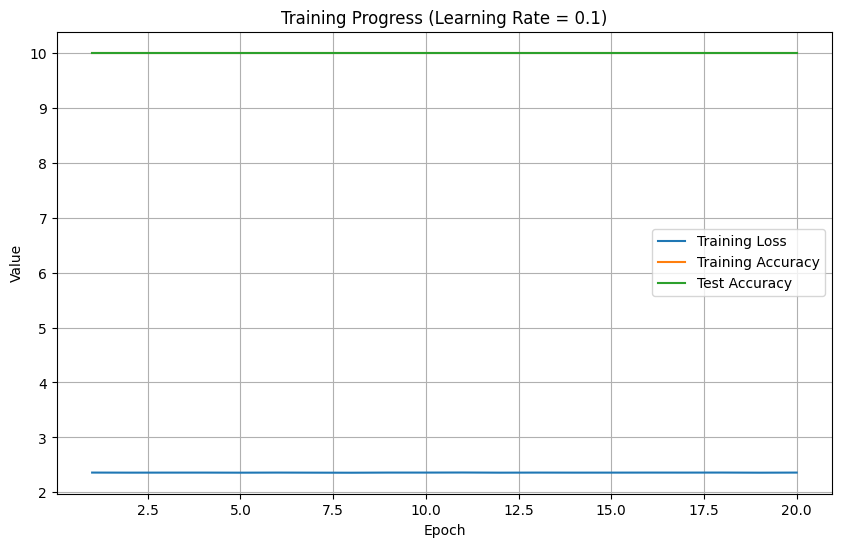

In [5]:
import torch.optim as optim
import matplotlib.pyplot as plt

learning_rates = [0.1]

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=4, shuffle=True, num_workers=2
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2
    )

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

    num_epochs = 20
    train_losses = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = 0.0
        net.train()

        for i, (inputs, labels) in enumerate(trainloader, 0):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_loss += loss.item()

            if i % 2000 == 1999:
                print(
                    f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
                )
                running_loss = 0.0

        # Average epoch loss
        avg_loss = epoch_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Training accuracy
        correct, total = 0, 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in trainloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Test accuracy
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

    print(f"Finished training with learning rate {lr}")
    print(f"Final Test Accuracy: {test_acc_list[-1]:.2f}%")

    # Save model
    PATH = f"./cifar_netq6_lr{lr}.pth"
    torch.save(net.state_dict(), PATH)
    print(f"Saved model to {PATH}")

    # Plot for this learning rate
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, train_acc_list, label="Training Accuracy")
    plt.plot(epochs, test_acc_list, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Training Progress (Learning Rate = {lr})")
    plt.legend()
    plt.grid(True)
    plt.show()


Training with learning rate = 0.01
[1,  2000] mini-batch loss: 2.103
[1,  4000] mini-batch loss: 1.940
[1,  6000] mini-batch loss: 1.968
[1,  8000] mini-batch loss: 1.966
[1, 10000] mini-batch loss: 1.944
[1, 12000] mini-batch loss: 1.952
[2,  2000] mini-batch loss: 1.954
[2,  4000] mini-batch loss: 1.957
[2,  6000] mini-batch loss: 1.957
[2,  8000] mini-batch loss: 1.972
[2, 10000] mini-batch loss: 1.963
[2, 12000] mini-batch loss: 1.968
[3,  2000] mini-batch loss: 1.983
[3,  4000] mini-batch loss: 1.995
[3,  6000] mini-batch loss: 2.021
[3,  8000] mini-batch loss: 1.994
[3, 10000] mini-batch loss: 2.015
[3, 12000] mini-batch loss: 2.038
[4,  2000] mini-batch loss: 2.049
[4,  4000] mini-batch loss: 2.046
[4,  6000] mini-batch loss: 2.026
[4,  8000] mini-batch loss: 2.008
[4, 10000] mini-batch loss: 2.056
[4, 12000] mini-batch loss: 2.088
[5,  2000] mini-batch loss: 2.052
[5,  4000] mini-batch loss: 2.072
[5,  6000] mini-batch loss: 2.158
[5,  8000] mini-batch loss: 2.145
[5, 10000] m

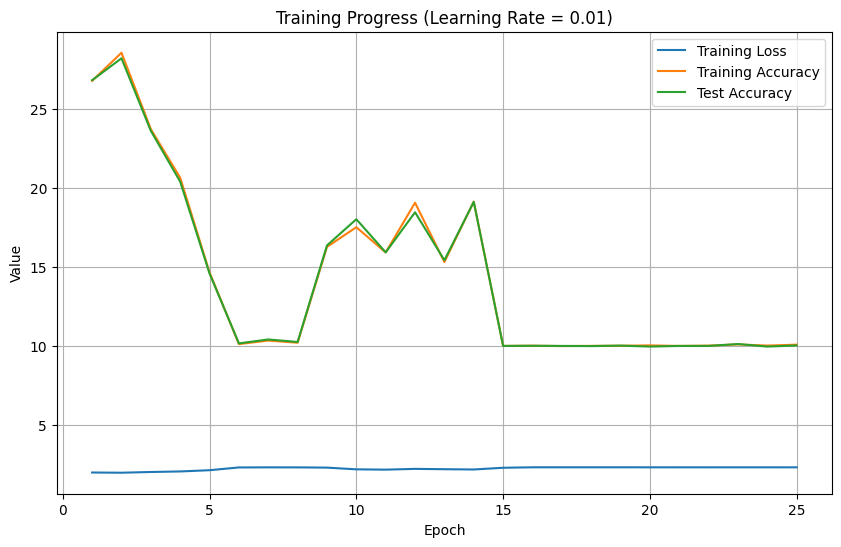

In [6]:
import torch.optim as optim
import matplotlib.pyplot as plt

learning_rates = [0.01]

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=4, shuffle=True, num_workers=2
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2
    )

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

    num_epochs = 25
    train_losses = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = 0.0
        net.train()

        for i, (inputs, labels) in enumerate(trainloader, 0):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_loss += loss.item()

            if i % 2000 == 1999:
                print(
                    f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
                )
                running_loss = 0.0

        # Average epoch loss
        avg_loss = epoch_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Training accuracy
        correct, total = 0, 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in trainloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Test accuracy
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

    print(f"Finished training with learning rate {lr}")
    print(f"Final Test Accuracy: {test_acc_list[-1]:.2f}%")

    # Save model
    PATH = f"./cifar_netq6_lr{lr}.pth"
    torch.save(net.state_dict(), PATH)
    print(f"Saved model to {PATH}")

    # Plot for this learning rate
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, train_acc_list, label="Training Accuracy")
    plt.plot(epochs, test_acc_list, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Training Progress (Learning Rate = {lr})")
    plt.legend()
    plt.grid(True)
    plt.show()


Training with learning rate = 0.001
[1,  2000] mini-batch loss: 2.214
[1,  4000] mini-batch loss: 1.860
[1,  6000] mini-batch loss: 1.654
[1,  8000] mini-batch loss: 1.579
[1, 10000] mini-batch loss: 1.512
[1, 12000] mini-batch loss: 1.491
[2,  2000] mini-batch loss: 1.421
[2,  4000] mini-batch loss: 1.380
[2,  6000] mini-batch loss: 1.375
[2,  8000] mini-batch loss: 1.361
[2, 10000] mini-batch loss: 1.303
[2, 12000] mini-batch loss: 1.291
[3,  2000] mini-batch loss: 1.234
[3,  4000] mini-batch loss: 1.224
[3,  6000] mini-batch loss: 1.230
[3,  8000] mini-batch loss: 1.191
[3, 10000] mini-batch loss: 1.192
[3, 12000] mini-batch loss: 1.180
[4,  2000] mini-batch loss: 1.106
[4,  4000] mini-batch loss: 1.114
[4,  6000] mini-batch loss: 1.113
[4,  8000] mini-batch loss: 1.112
[4, 10000] mini-batch loss: 1.111
[4, 12000] mini-batch loss: 1.103
[5,  2000] mini-batch loss: 1.020
[5,  4000] mini-batch loss: 1.031
[5,  6000] mini-batch loss: 1.042
[5,  8000] mini-batch loss: 1.064
[5, 10000] 

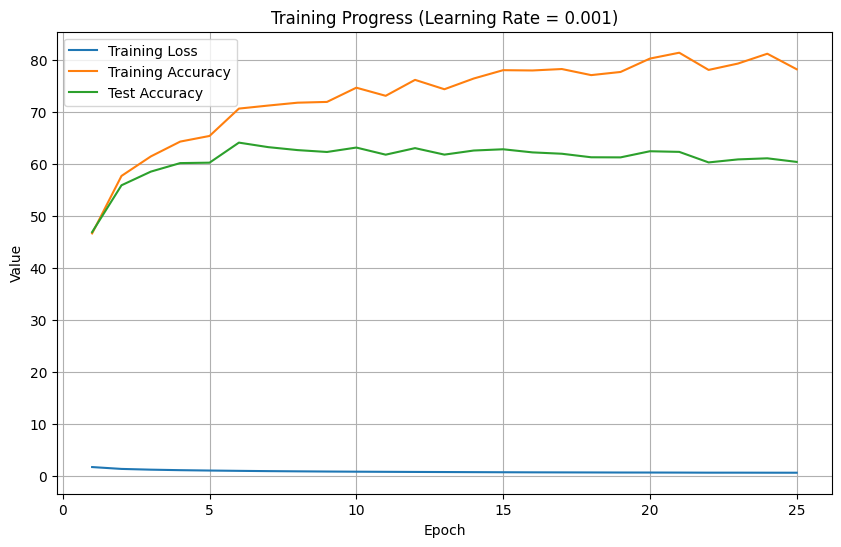

In [7]:
learning_rates = [0.001]

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=4, shuffle=True, num_workers=2
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2
    )

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

    num_epochs = 25
    train_losses = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_loss = 0.0
        net.train()

        for i, (inputs, labels) in enumerate(trainloader, 0):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_loss += loss.item()

            if i % 2000 == 1999:
                print(
                    f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
                )
                running_loss = 0.0

        # Average epoch loss
        avg_loss = epoch_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Training accuracy
        correct, total = 0, 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in trainloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Test accuracy
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

    print(f"Finished training with learning rate {lr}")
    print(f"Final Test Accuracy: {test_acc_list[-1]:.2f}%")

    # Save model
    PATH = f"./cifar_netq6_lr{lr}.pth"
    torch.save(net.state_dict(), PATH)
    print(f"Saved model to {PATH}")

    # Plot for this learning rate
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, train_acc_list, label="Training Accuracy")
    plt.plot(epochs, test_acc_list, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Training Progress (Learning Rate = {lr})")
    plt.legend()
    plt.grid(True)
    plt.show()


Evaluating model with learning rate = 10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


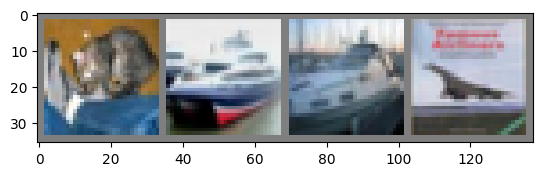

GroundTruth:  cat   ship  ship  plane
Predicted:  plane plane plane plane
Accuracy of the network on the 10000 test images: 10.00 %
Accuracy for class: plane is 100.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %

Evaluating model with learning rate = 0.1


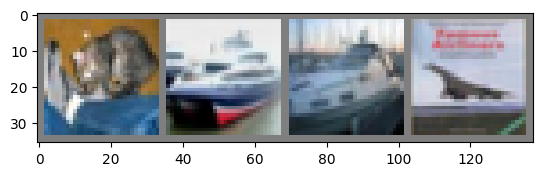

GroundTruth:  cat   ship  ship  plane
Predicted:  truck truck truck truck
Accuracy of the network on the 10000 test images: 10.00 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 100.0 %

Evaluating model with learning rate = 0.01


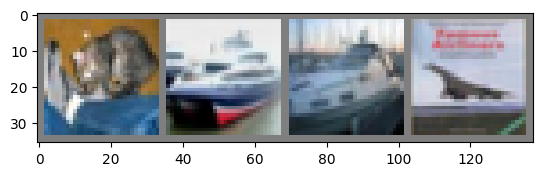

GroundTruth:  cat   ship  ship  plane
Predicted:  car   car   car   car  
Accuracy of the network on the 10000 test images: 10.03 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 100.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.3 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %

Evaluating model with learning rate = 0.001


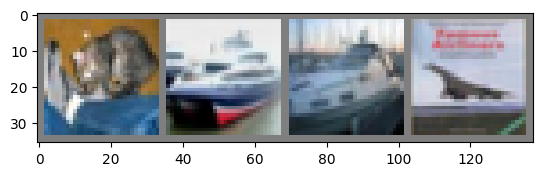

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  car   plane
Accuracy of the network on the 10000 test images: 60.44 %
Accuracy for class: plane is 57.2 %
Accuracy for class: car   is 77.0 %
Accuracy for class: bird  is 50.2 %
Accuracy for class: cat   is 46.5 %
Accuracy for class: deer  is 49.6 %
Accuracy for class: dog   is 51.5 %
Accuracy for class: frog  is 68.2 %
Accuracy for class: horse is 70.8 %
Accuracy for class: ship  is 74.2 %
Accuracy for class: truck is 59.2 %


In [8]:
learning_rates = [10, 0.1, 0.01, 0.001]

for lr in learning_rates:
    print(f"\nEvaluating model with learning rate = {lr}")

    # Load the model trained with this learning rate
    net = Net()
    PATH = (
        f"./cifar_netq6_lr{lr}.pth"  # Make sure you saved the models with this naming
    )
    net.load_state_dict(torch.load(PATH, weights_only=True))
    net.eval()

    # Show some test images and ground truth
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    imshow(torchvision.utils.make_grid(images))
    print(
        "GroundTruth: ",
        " ".join(f"{classes[labels[j]]:5s}" for j in range(len(labels))),
    )

    # Make predictions for these images
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print(
        "Predicted: ",
        " ".join(f"{classes[predicted[j]]:5s}" for j in range(len(predicted))),
    )

    # Overall accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(
        f"Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %"
    )

    # Accuracy per class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
